In [1]:
import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# setup Device

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Make Data

In [3]:
x,y = make_circles(n_samples = 1000 , noise = .04, random_state = 42)

In [4]:
len(x[:,0])

1000

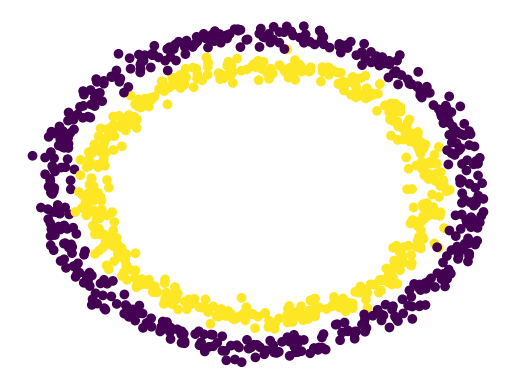

In [5]:
plt.scatter(x=x[:,0], y=x[:,1], c = y)
_= plt.axis(False)

In [6]:
print('shape: ',x.shape, y.shape)
print('dtype: ', x.dtype, y.dtype)

shape:  (1000, 2) (1000,)
dtype:  float64 int64


In [7]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
y = y.unsqueeze(1)

In [9]:
print('shape: ',x.shape, y.shape)
print('dtype: ', x.dtype, y.dtype)

shape:  torch.Size([1000, 2]) torch.Size([1000, 1])
dtype:  torch.float32 torch.float32


In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.1, random_state=42)

In [11]:
xtrain = xtrain.to(device)
xtest = xtest.to(device)
ytrain = ytrain.to(device)
ytest = ytest.to(device)

In [12]:
print('xtrain: ', xtrain.shape)
print('ytrain: ', ytrain.shape)
print('xtest: ', xtest.shape)
print('ytest: ', ytest.shape)

xtrain:  torch.Size([900, 2])
ytrain:  torch.Size([900, 1])
xtest:  torch.Size([100, 2])
ytest:  torch.Size([100, 1])


In [13]:
def plot_pred(pred=None):
    plt.scatter(x = xtrain[:,0].cpu(),
                y = xtrain[:,1].cpu(),
                c = ytrain.cpu(), label='train')

    if pred is not None:
        plt.scatter(x = xtest[:,0].cpu(),
                    y = xtest[:,1].cpu(),
                    c = pred.cpu(), label = 'pred')
    plt.legend()

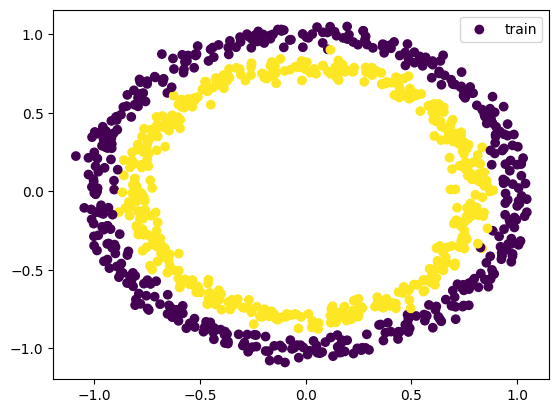

In [14]:
plot_pred()

# Make Model

In [15]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=32)
        self.layer2 = nn.Linear(in_features=32, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

In [16]:
onemodel = CircleModel()
onemodel.to(device)

CircleModel(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
)

In [17]:
next(onemodel.parameters()).device

device(type='cpu')

# Optimizer, Loss and Accuracy

In [18]:
# optimizers and Loss
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=onemodel.parameters(), lr = .001)

In [19]:
# Accuracy
def accuracy(ytrue, ypred):
    correct = torch.eq(ytrue, ypred).sum().item()
    return (correct/len(ypred))*100

## Untrained Model prediction test

In [20]:
with torch.inference_mode():
    un_pred = onemodel(xtest) 

In [21]:
un_pred.shape

torch.Size([100, 1])

In [22]:
accuracy(ytest, un_pred)


0.0

# Training Loop

In [23]:
epoch = 1000

losses = []
test_losses = []

for i in range(epoch):

    ypred_logits = onemodel(xtrain)
    ypred = torch.round(torch.sigmoid(ypred_logits))
    # ypred = 
    # loss
    loss = loss_fn(ypred_logits,ytrain)
    losses.append(loss)

    # optimizer
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    onemodel.eval()

    if i % 50 ==0:
        with torch.inference_mode():
            test_pred_logits = onemodel(xtest)
            test_pred = torch.round(torch.sigmoid(test_pred_logits))

            test_loss = loss_fn(test_pred_logits, ytest)
            test_losses.append(test_loss)

        print(f'epoch : {i:3}  | loss : {loss:.5f} | accuracy : {accuracy(ytrain, ypred):.5f} | test_loss : {test_loss:.5f} | test_acc : {accuracy(ytest, test_pred):.5f}')


epoch :   0  | loss : 0.72278 | accuracy : 50.22222 | test_loss : 0.75587 | test_acc : 48.00000
epoch :  50  | loss : 0.71794 | accuracy : 50.22222 | test_loss : 0.75006 | test_acc : 48.00000
epoch : 100  | loss : 0.71392 | accuracy : 50.22222 | test_loss : 0.74512 | test_acc : 48.00000
epoch : 150  | loss : 0.71057 | accuracy : 50.22222 | test_loss : 0.74091 | test_acc : 48.00000
epoch : 200  | loss : 0.70779 | accuracy : 50.22222 | test_loss : 0.73732 | test_acc : 48.00000
epoch : 250  | loss : 0.70548 | accuracy : 49.55556 | test_loss : 0.73424 | test_acc : 48.00000
epoch : 300  | loss : 0.70356 | accuracy : 45.11111 | test_loss : 0.73160 | test_acc : 44.00000
epoch : 350  | loss : 0.70196 | accuracy : 42.33333 | test_loss : 0.72932 | test_acc : 39.00000
epoch : 400  | loss : 0.70063 | accuracy : 41.77778 | test_loss : 0.72734 | test_acc : 41.00000
epoch : 450  | loss : 0.69952 | accuracy : 43.66667 | test_loss : 0.72563 | test_acc : 42.00000
epoch : 500  | loss : 0.69860 | accuracy

In [24]:
with torch.inference_mode():
    pred1 = onemodel(xtest)
    pred1 = torch.round(torch.sigmoid(pred1))


In [25]:
pred1.cpu().numpy()

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

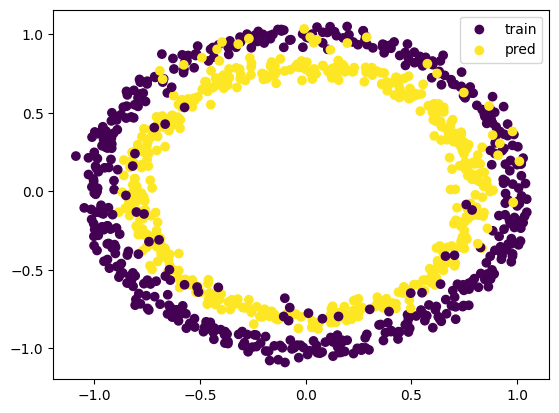

In [26]:
plot_pred(pred1)

# Model V2

In [99]:
class CircleModel2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=32)
        self.layer2 = nn.Linear(in_features=32, out_features=64)
        self.layer3 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [110]:
tmodel = CircleModel2()
tmodel.to(device)

CircleModel2(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [111]:
next(tmodel.parameters()).device

device(type='cpu')

# Optimizer, Loss and Accuracy

In [112]:
# optimizers and Loss
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=tmodel.parameters(), lr = .00005)

In [113]:
# Accuracy
def accuracy(ytrue, ypred):
    correct = torch.eq(ytrue, ypred).sum().item()
    return (correct/len(ypred))*100

# Training Loop

In [114]:
epoch = 10000

losses = []
test_losses = []

acc = []
test_acc = []

epochs_list = []
for i in range(epoch):

    ypred_logits = tmodel(xtrain)
    ypred = torch.round(torch.sigmoid(ypred_logits))
    # ypred = 
    # loss
    loss = loss_fn(ypred_logits,ytrain)
    # losses.append(loss)

    # optimizer
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    onemodel.eval()

    if i % 400 ==0 or i==(epoch-1):
        with torch.inference_mode():
            test_pred_logits = tmodel(xtest)
            test_pred = torch.round(torch.sigmoid(test_pred_logits))

            test_loss = loss_fn(test_pred_logits, ytest)
            
            train_accuracy = accuracy(ytrain, ypred)

            test_accuracy = accuracy(ytest, test_pred)


            test_losses.append(test_loss)
            losses.append(loss)
            epochs_list.append(i)

            acc.append(train_accuracy)
            test_acc.append(test_accuracy)

        print(f'epoch : {i:5}  | loss : {loss:.5f}  accuracy : {train_accuracy:.5f} | test_loss : {test_loss:.5f}  test_acc : {test_accuracy:.5f}')


epoch :     0  | loss : 0.69583  accuracy : 50.88889 | test_loss : 0.69278  test_acc : 53.00000
epoch :   400  | loss : 0.68249  accuracy : 70.33333 | test_loss : 0.68666  test_acc : 67.00000
epoch :   800  | loss : 0.65934  accuracy : 85.33333 | test_loss : 0.66623  test_acc : 86.00000
epoch :  1200  | loss : 0.61325  accuracy : 95.66667 | test_loss : 0.62163  test_acc : 95.00000
epoch :  1600  | loss : 0.54859  accuracy : 98.44444 | test_loss : 0.56046  test_acc : 98.00000
epoch :  2000  | loss : 0.47414  accuracy : 98.77778 | test_loss : 0.49092  test_acc : 98.00000
epoch :  2400  | loss : 0.40014  accuracy : 98.88889 | test_loss : 0.42163  test_acc : 98.00000
epoch :  2800  | loss : 0.33226  accuracy : 99.00000 | test_loss : 0.35742  test_acc : 98.00000
epoch :  3200  | loss : 0.27308  accuracy : 98.77778 | test_loss : 0.30045  test_acc : 98.00000
epoch :  3600  | loss : 0.22406  accuracy : 99.22222 | test_loss : 0.25220  test_acc : 98.00000
epoch :  4000  | loss : 0.18424  accurac

In [115]:
losses = [i.cpu().item() for i in losses]
test_losses = [i.cpu().item() for i in test_losses]

Text(0.5, 1.0, 'LOSS')

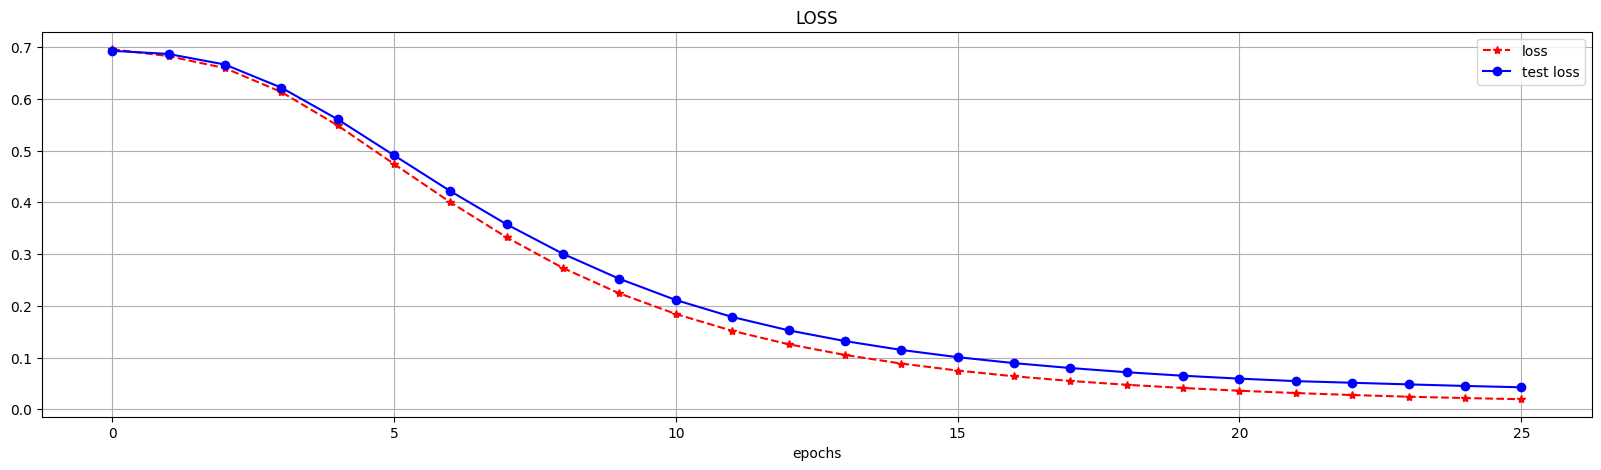

In [116]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.plot(losses, label='loss', marker = '*', linestyle = '--', color = 'red')
plt.plot(test_losses, label='test loss', marker='o', color='blue')
plt.xlabel('epochs')
plt.legend()
plt.title('LOSS')

Text(0.5, 1.0, 'Accuracy')

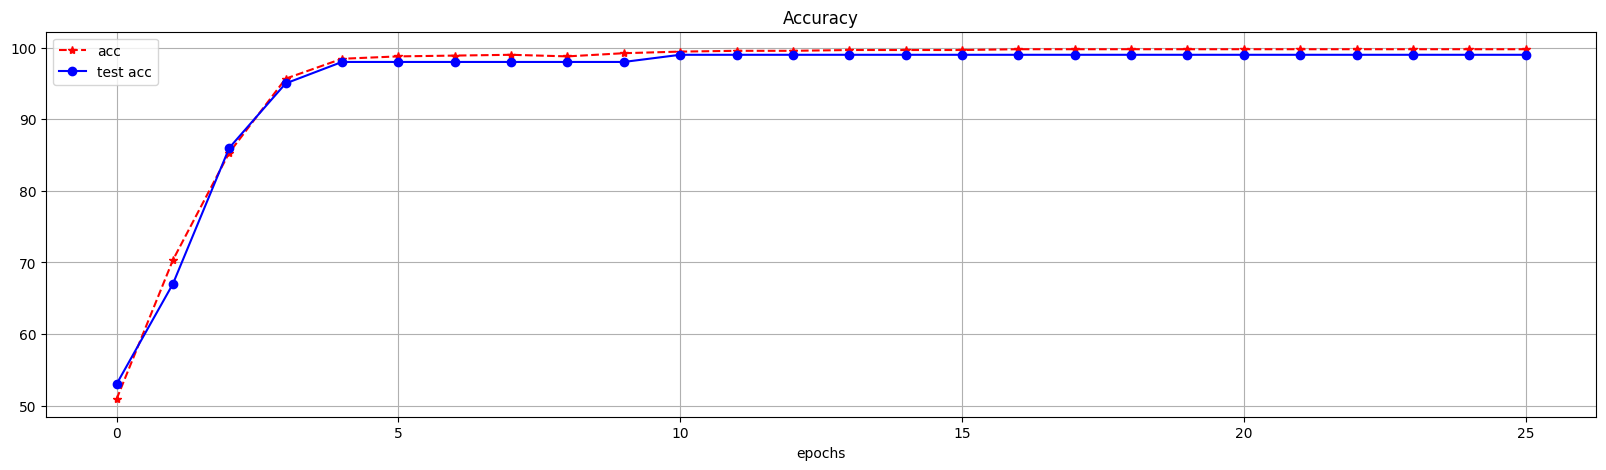

In [117]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.plot(acc, label='acc', marker = '*', linestyle = '--', color = 'red')
plt.plot(test_acc, label='test acc', marker='o', color='blue')
plt.xlabel('epochs')
plt.legend()
plt.title('Accuracy')

In [118]:
with torch.inference_mode():
    pred1 = tmodel(xtest)
    pred1 = torch.round(torch.sigmoid(pred1))


In [119]:
pred1.cpu().numpy()

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

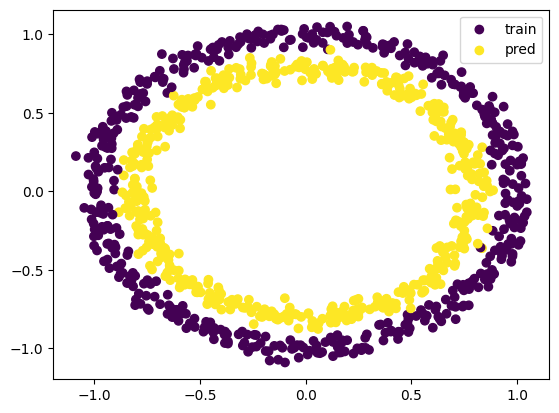

In [120]:
plot_pred(pred1)